<a href="https://colab.research.google.com/github/Nimrat4/MNIST-Digit-Classification-using-Feed-Forward-Networks-and-Keras/blob/main/Mnist_L1_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train_, y_train_), (X_test_, y_test_) = mnist.load_data()

In [ ]:
print("Training set shape (images):", X_train_.shape)  # (60,000, 28, 28)
print("Training set shape (labels):", y_train_.shape)  # (60,000,)
print("Test set shape (images):", X_test_.shape)       # (10,000, 28, 28)
print("Test set shape (labels):", y_test_.shape)       # (10,000,)

Training set shape (images): (60000, 28, 28)
Training set shape (labels): (60000,)
Test set shape (images): (10000, 28, 28)
Test set shape (labels): (10000,)


In [ ]:
# Reshape images to (n_samples, 784)
X_train_flat = X_train_.reshape(X_train_.shape[0], -1)
X_test_flat = X_test_.reshape(X_test_.shape[0], -1)

# Scale features to range [0, 1]
X_train_scale = X_train_flat / 255.0
X_test_scale = X_test_flat / 255.0

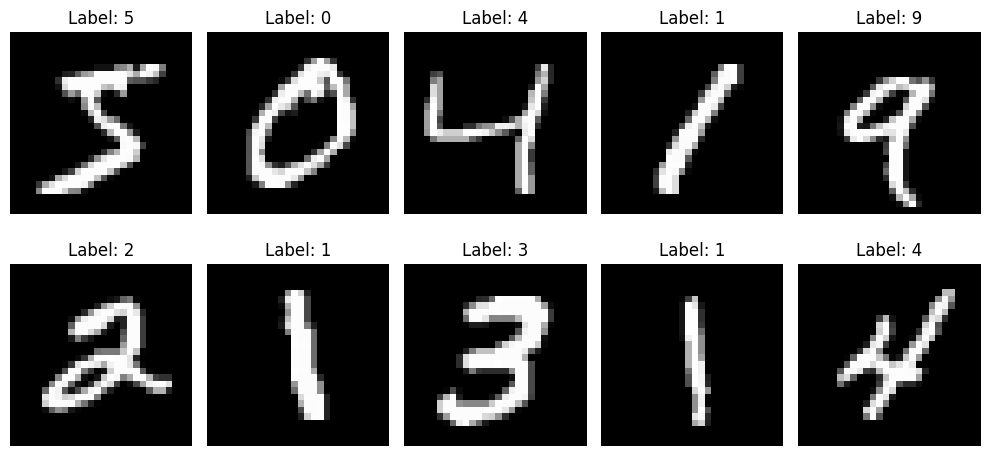

In [ ]:

# Plot the first 10 images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Label: {y_train_[i]}")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X_train_scale, y_train_, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)  # (48,000, 784)
print("Testing set shape:", X_test.shape)    # (12,000, 784)

Training set shape: (48000, 784)
Testing set shape: (12000, 784)


In [ ]:
from sklearn.neural_network import MLPClassifier

# Define and train the model
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=10, random_state=42)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64,), max_iter=10, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Predict on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9678333333333333
Precision: 0.9679264036838678
Recall: 0.9678333333333333
F1 Score: 0.9678320892918264


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


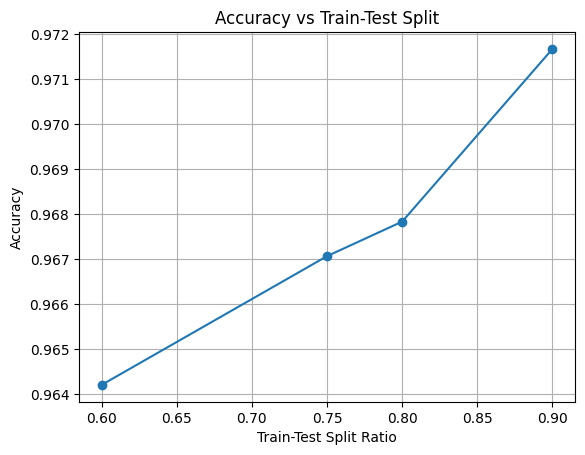

In [ ]:
splits = [0.6, 0.75, 0.8, 0.9]
accuracies = []

for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X_train_scale, y_train_, test_size=1-split, random_state=42
    )
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs train-test split
plt.plot(splits, accuracies, marker="o")
plt.xlabel("Train-Test Split Ratio")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Train-Test Split")
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


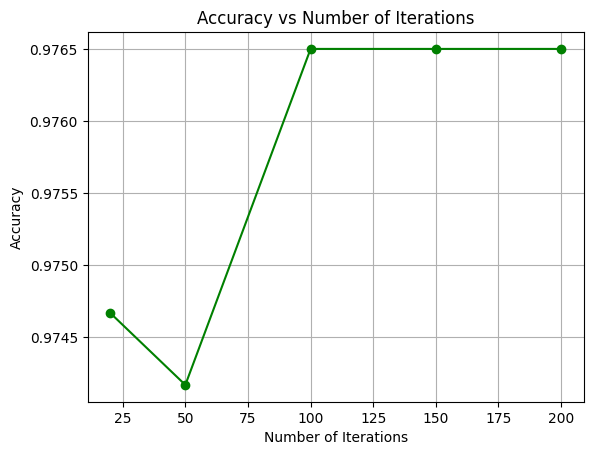

In [ ]:
iterations = [20, 50, 100, 150, 200]
iteration_accuracies = []

for iters in iterations:
    mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=iters, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    iteration_accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs number of iterations
plt.plot(iterations, iteration_accuracies, marker="o", color="green")
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Iterations")
plt.grid()
plt.show()

In [ ]:
#PART2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from time import time

# Define the number of nodes to test
node_configs = [4, 32, 64, 128, 512, 2056]

# Prepare data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Loop through each node configuration
for nodes in node_configs:
    # Build the model
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(nodes, activation="relu"),
        Dense(10, activation="softmax")
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

    # Measure training time
    start_time = time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    end_time = time()

    # Evaluate the model
    train_acc = history.history["accuracy"][-1]
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    params = model.count_params()

    # Print results
    print(f"Nodes: {nodes}")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Parameters: {params}")
    print(f"Training Time: {end_time - start_time:.2f} seconds")




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Nodes: 4
Train Accuracy: 0.8503, Test Accuracy: 0.8451
Parameters: 3190
Training Time: 48.78 seconds
Nodes: 32
Train Accuracy: 0.9786, Test Accuracy: 0.9640
Parameters: 25450
Training Time: 31.58 seconds
Nodes: 64
Train Accuracy: 0.9910, Test Accuracy: 0.9764
Parameters: 50890
Training Time: 29.61 seconds
Nodes: 128
Train Accuracy: 0.9952, Test Accuracy: 0.9780
Parameters: 101770
Training Time: 34.10 seconds
Nodes: 512
Train Accuracy: 0.9966, Test Accuracy: 0.9782
Parameters: 407050
Training Time: 32.11 seconds
Nodes: 2056
Train Accuracy: 0.9956, Test Accuracy: 0.9794
Parameters: 1634530
Training Time: 41.99 seconds


In [ ]:

layer_configs = [4, 5, 6, 8, 16]

for layers in layer_configs:
    # Build the model
    model = Sequential([Flatten(input_shape=(28, 28))])
    for _ in range(layers):
        model.add(Dense(64, activation="relu"))
    model.add(Dense(10, activation="softmax"))

    # Compile the model
    model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

    # Measure training time for 10 epochs
    start_time = time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    end_time = time()

    # Evaluate for 10 epochs
    train_acc_10 = history.history["accuracy"][-1]
    test_acc_10 = model.evaluate(X_test, y_test, verbose=0)[1]

    # Train for 30 epochs
    start_time_30 = time()
    history_30 = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)
    end_time_30 = time()

    # Evaluate for 30 epochs
    train_acc_30 = history_30.history["accuracy"][-1]
    test_acc_30 = model.evaluate(X_test, y_test, verbose=0)[1]

    # Print results
    print(f"Layers: {layers}")
    print(f"10 Epochs -> Train Accuracy: {train_acc_10:.4f}, Test Accuracy: {test_acc_10:.4f}")
    print(f"30 Epochs -> Train Accuracy: {train_acc_30:.4f}, Test Accuracy: {test_acc_30:.4f}")
    print(f"Training Time (10 Epochs): {end_time - start_time:.2f} seconds")
    print(f"Training Time (30 Epochs): {end_time_30 - start_time_30:.2f} seconds")

Layers: 4
10 Epochs -> Train Accuracy: 0.9893, Test Accuracy: 0.9735
30 Epochs -> Train Accuracy: 0.9969, Test Accuracy: 0.9755
Training Time (10 Epochs): 47.51 seconds
Training Time (30 Epochs): 126.13 seconds
Layers: 5
10 Epochs -> Train Accuracy: 0.9882, Test Accuracy: 0.9755
30 Epochs -> Train Accuracy: 0.9962, Test Accuracy: 0.9759
Training Time (10 Epochs): 48.31 seconds
Training Time (30 Epochs): 119.67 seconds
Layers: 6
10 Epochs -> Train Accuracy: 0.9868, Test Accuracy: 0.9652
30 Epochs -> Train Accuracy: 0.9960, Test Accuracy: 0.9735
Training Time (10 Epochs): 45.54 seconds
Training Time (30 Epochs): 122.43 seconds
Layers: 8
10 Epochs -> Train Accuracy: 0.9855, Test Accuracy: 0.9748
30 Epochs -> Train Accuracy: 0.9960, Test Accuracy: 0.9717
Training Time (10 Epochs): 43.94 seconds
Training Time (30 Epochs): 129.61 seconds
Layers: 16
10 Epochs -> Train Accuracy: 0.9769, Test Accuracy: 0.9712
30 Epochs -> Train Accuracy: 0.9905, Test Accuracy: 0.9745
Training Time (10 Epochs): 

In [ ]:
configs = [
    [256, 128, 64, 32],  # a)
    [128, 512, 128, 64],  # b)
    [64, 128, 64, 128],  # c)
    [64, 32, 4, 32, 64] # d)
]

for config in configs:
    # Build the model
    model = Sequential([Flatten(input_shape=(28, 28))])
    for nodes in config:
        model.add(Dense(nodes, activation="relu"))
    model.add(Dense(10, activation="softmax"))

    # Compile the model
    model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

    # Train and measure time
    start_time = time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    end_time = time()

    # Evaluate
    train_acc = history.history["accuracy"][-1]
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    params = model.count_params()

    # Print results
    print(f"Config: {config}")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Parameters: {params}")
    print(f"Training Time: {end_time - start_time:.2f} seconds")
    print("-" * 40)

Config: [256, 128, 64, 32]
Train Accuracy: 0.9931, Test Accuracy: 0.9791
Parameters: 244522
Training Time: 48.14 seconds
----------------------------------------
Config: [128, 512, 128, 64]
Train Accuracy: 0.9915, Test Accuracy: 0.9803
Parameters: 241098
Training Time: 47.95 seconds
----------------------------------------
Config: [64, 128, 64, 128]
Train Accuracy: 0.9893, Test Accuracy: 0.9726
Parameters: 76426
Training Time: 40.71 seconds
----------------------------------------
Config: [64, 32, 4, 32, 64]
Train Accuracy: 0.9818, Test Accuracy: 0.9636
Parameters: 55374
Training Time: 49.83 seconds
----------------------------------------


In [ ]:
# Build and train the model with 4 hidden layers, 256 nodes each
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

# Train and measure time
start_time = time()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
end_time = time()

# Evaluate the model
train_acc = history.history["accuracy"][-1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]

# Print results
print("4 Hidden Layers (256 Nodes Each)")
print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
print(f"Parameters: {model.count_params()}")
print(f"Training Time: {end_time - start_time:.2f} seconds")
print("-" * 40)

4 Hidden Layers (256 Nodes Each)
Train Accuracy: 0.9923, Test Accuracy: 0.9804
Parameters: 400906
Training Time: 50.98 seconds
----------------------------------------


In [ ]:
# Different training and testing sizes
splits = [0.6, 0.7, 0.8, 0.9]

for split in splits:
    # Split the dataset
    train_size = int(split * len(X_train))
    X_train_split, y_train_split = X_train[:train_size], y_train[:train_size]
    X_test_split, y_test_split = X_train[train_size:], y_train[train_size:]

    # Build the model
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation="relu"),
        Dense(10, activation="softmax")
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

    # Train and measure time
    start_time = time()
    history = model.fit(X_train_split, y_train_split, epochs=10, batch_size=32, verbose=0)
    end_time = time()

    # Evaluate the model
    train_acc = history.history["accuracy"][-1]
    test_acc = model.evaluate(X_test_split, y_test_split, verbose=0)[1]

    # Print results
    print(f"Train-Test Split: {int(split*100)}-{int((1-split)*100)}")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Training Time: {end_time - start_time:.2f} seconds")
    print("-" * 40)

Train-Test Split: 60-40
Train Accuracy: 0.9956, Test Accuracy: 0.9689
Training Time: 24.22 seconds
----------------------------------------
Train-Test Split: 70-30
Train Accuracy: 0.9955, Test Accuracy: 0.9733
Training Time: 28.65 seconds
----------------------------------------
Train-Test Split: 80-19
Train Accuracy: 0.9944, Test Accuracy: 0.9767
Training Time: 27.96 seconds
----------------------------------------
Train-Test Split: 90-9
Train Accuracy: 0.9955, Test Accuracy: 0.9805
Training Time: 31.83 seconds
----------------------------------------


In [ ]:
# Activation functions to test
activations = ["sigmoid", "tanh", "relu"]

for activation in activations:
    # Build the model
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation=activation),
        Dense(64, activation=activation),
        Dense(64, activation=activation),
        Dense(64, activation=activation),
        Dense(10, activation="softmax")
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

    # Train for 10 epochs
    start_time_10 = time()
    history_10 = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    end_time_10 = time()

    # Train for 30 epochs
    start_time_30 = time()
    history_30 = model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)
    end_time_30 = time()

    # Evaluate
    train_acc_10 = history_10.history["accuracy"][-1]
    test_acc_10 = model.evaluate(X_test, y_test, verbose=0)[1]
    train_acc_30 = history_30.history["accuracy"][-1]
    test_acc_30 = model.evaluate(X_test, y_test, verbose=0)[1]

    # Print results
    print(f"Activation: {activation}")
    print(f"10 Epochs -> Train Accuracy: {train_acc_10:.4f}, Test Accuracy: {test_acc_10:.4f}")
    print(f"30 Epochs -> Train Accuracy: {train_acc_30:.4f}, Test Accuracy: {test_acc_30:.4f}")
    print(f"Training Time (10 Epochs): {end_time_10 - start_time_10:.2f} seconds")
    print(f"Training Time (30 Epochs): {end_time_30 - start_time_30:.2f} seconds")
    print("-" * 40)
 # Activation combinations
combinations = [
    ["sigmoid", "relu", "tanh"],
    ["tanh", "sigmoid", "relu"],
    ["relu", "relu", "relu"]
]

for combo in combinations:
    # Build the model
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(32, activation=combo[0]),bvvvvvvvvvvvvvvvc
        Dense(32, activation=combo[1]),
        Dense(32, activation=combo[2]),
        Dense(10, activation="softmax")
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

    # Train the model
    start_time = time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    end_time = time()

    # Evaluate the model
    train_acc = history.history["accuracy"][-1]
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]

    # Print results
    print(f"Activation Combination: {combo}")
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Training Time: {end_time - start_time:.2f} seconds")
    print("-" * 40)

Activation: sigmoid
10 Epochs -> Train Accuracy: 0.9850, Test Accuracy: 0.9715
30 Epochs -> Train Accuracy: 0.9976, Test Accuracy: 0.9715
Training Time (10 Epochs): 45.25 seconds
Training Time (30 Epochs): 130.79 seconds
----------------------------------------
Activation: tanh
10 Epochs -> Train Accuracy: 0.9899, Test Accuracy: 0.9720
30 Epochs -> Train Accuracy: 0.9964, Test Accuracy: 0.9720
Training Time (10 Epochs): 40.40 seconds
Training Time (30 Epochs): 116.94 seconds
----------------------------------------
Activation: relu
10 Epochs -> Train Accuracy: 0.9889, Test Accuracy: 0.9783
30 Epochs -> Train Accuracy: 0.9969, Test Accuracy: 0.9783
Training Time (10 Epochs): 45.18 seconds
Training Time (30 Epochs): 126.17 seconds
----------------------------------------
Activation Combination: ['sigmoid', 'relu', 'tanh']
Train Accuracy: 0.9807, Test Accuracy: 0.9703
Training Time: 43.93 seconds
----------------------------------------
Activation Combination: ['tanh', 'sigmoid', 'relu']
